In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
def load_dataset(folder_path):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        try:
            print("Loading in", filename)
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (300, 300))
            images.append(img)

            # Extract mana cost from the filename
            label = int(filename.split('_')[-1].split('.')[0])
            labels.append(label)
        except:
            print(filename, "gave an error - not loaded")
            continue

    return np.array(images), np.array(labels)

In [6]:
images, labels = load_dataset('images')

Loading in Eruth__Tormented_Prophet_3.jpg
Loading in Esika__God_of_the_Tree_3.jpg
Loading in Esior__Wardwing_Familiar_2.jpg
Loading in Esix__Fractal_Bloom_6.jpg
Loading in Estrid__the_Masked_4.jpg
Loading in Etali__Primal_Conqueror_7.jpg
Loading in Etali__Primal_Storm_6.jpg
Loading in Etrata__Deadly_Fugitive_3.jpg
Loading in Etrata__the_Silencer_4.jpg
Loading in Eutropia_the_Twice-Favored_3.jpg
Loading in Evelyn__the_Covetous_5.jpg
Loading in Evra__Halcyon_Witness_6.jpg
Loading in Exava__Rakdos_Blood_Witch_4.jpg
Loading in Experiment_Kraj_6.jpg
Loading in Extus__Oriq_Overlord_4.jpg
Loading in Ezio_Auditore_da_Firenze_2.jpg
Loading in Ezio__Blade_of_Vengeance_5.jpg
Loading in Ezrim__Agency_Chief_5.jpg
Loading in Ezuri__Claw_of_Progress_4.jpg
Loading in Ezuri__Renegade_Leader_3.jpg
Loading in Ezuri__Stalker_of_Spheres_4.jpg
Loading in Faceless_One_5.jpg
Loading in Fain__the_Broker_3.jpg
Loading in Falco_Spara__Pactweaver_4.jpg
Loading in Faldorn__Dread_Wolf_Herald_3.jpg
Loading in Falthi

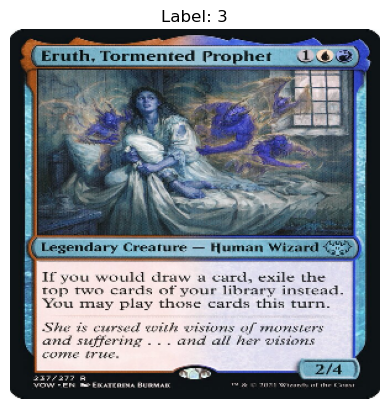

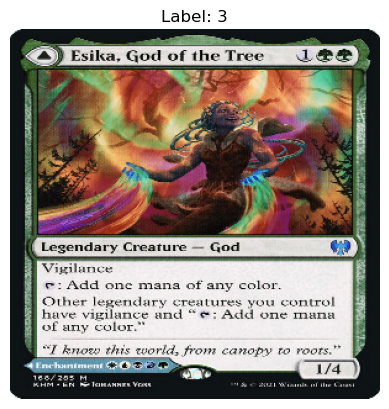

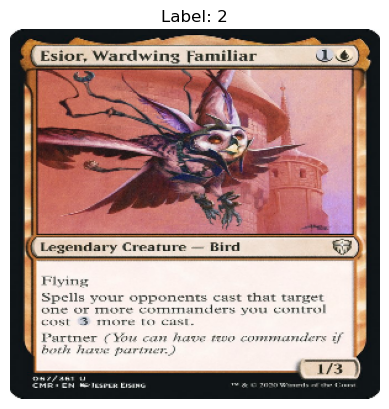

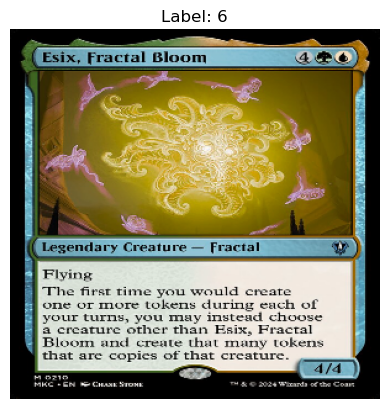

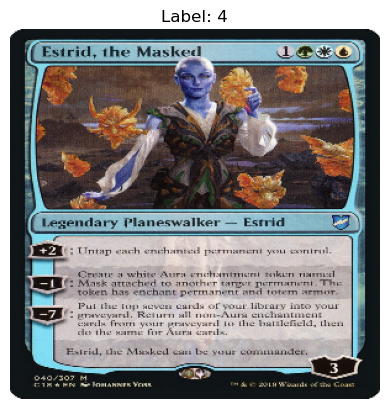

In [7]:


for i in range(5):  # Display the first 5 images
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
    plt.show()

In [21]:
def display_image(image, label=None):
    plt.imshow(image)
    if label:
        plt.title(f"Label: {labels[i]}")
    plt.axis('off')
    plt.show()

In [27]:
def crop_top_right_quarter(image):
    height, width, _ = image.shape
    top_right_quarter = image[0:height//2, width//2:width]
    final_image = cv2.resize(top_right_quarter, (150, 150))
    return top_right_quarter

In [28]:
test_image_cropped = crop_top_right_quarter(images[0])

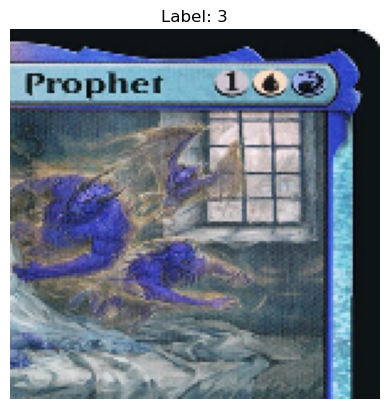

In [29]:
plt.imshow(test_image_cropped)
plt.title(f"Label: {labels[0]}")
plt.axis('off')
plt.show()

In [68]:
cropped_images = [crop_top_right_quarter(image) for image in images]

In [69]:
len(cropped_images)

1146

In [72]:
# Normalize values
cropped_images_normalized = [cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) for img in cropped_images]
print(cropped_images_normalized[0])


[[[0.05490196 0.07450981 0.08627451]
  [0.05490196 0.07450981 0.08627451]
  [0.05490196 0.07450981 0.08627451]
  ...
  [0.9921569  1.         0.9960785 ]
  [0.9921569  1.         0.9960785 ]
  [0.9921569  1.         0.9960785 ]]

 [[0.05490196 0.07450981 0.08627451]
  [0.05490196 0.07450981 0.08627451]
  [0.05490196 0.07450981 0.08627451]
  ...
  [0.98823535 0.9960785  0.9960785 ]
  [0.98823535 1.         0.9921569 ]
  [0.9921569  1.         0.9960785 ]]

 [[0.0509804  0.07058824 0.08235294]
  [0.05490196 0.07450981 0.08627451]
  [0.05882353 0.07843138 0.08627451]
  ...
  [0.9803922  0.98823535 0.98823535]
  [0.98823535 0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]]

 ...

 [[0.3137255  0.42352945 0.48627454]
  [0.3372549  0.43921572 0.5019608 ]
  [0.3019608  0.40784317 0.4666667 ]
  ...
  [0.05490196 0.07450981 0.08627451]
  [0.05490196 0.07450981 0.08627451]
  [0.05490196 0.07450981 0.08627451]]

 [[0.35686275 0.46274513 0.5254902 ]
  [0.29411766 0.39607847 0.46274513]


In [73]:
images_train, images_test, labels_train, labels_test = train_test_split(cropped_images, labels, test_size=0.2, random_state=42)

In [74]:
print(len(images_train), len(labels_train))
print(len(images_test), len(labels_test))
print(916 + 230)
print(images_train[0].shape)
print(labels_train[0].shape)

916 916
230 230
1146
(150, 150, 3)
()


In [76]:
print(images_train[0])

[[[185 176 165]
  [184 175 165]
  [180 171 161]
  ...
  [253 255 255]
  [255 255 253]
  [255 255 252]]

 [[184 175 165]
  [184 175 165]
  [181 172 162]
  ...
  [253 255 255]
  [253 255 255]
  [253 255 254]]

 [[180 171 161]
  [181 172 162]
  [183 173 163]
  ...
  [255 255 254]
  [255 254 255]
  [253 255 255]]

 ...

 [[ 34  33  80]
  [ 32  34  80]
  [ 30  33  76]
  ...
  [183 174 164]
  [182 173 163]
  [185 176 166]]

 [[ 30  36  75]
  [ 28  35  74]
  [ 28  33  72]
  ...
  [185 176 166]
  [187 178 168]
  [186 177 167]]

 [[ 25  32  72]
  [ 26  31  65]
  [ 28  31  55]
  ...
  [184 175 165]
  [185 176 166]
  [185 176 166]]]


In [92]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

In [93]:
images_train = np.array(images_train)
images_test = np.array(images_test)

In [94]:
images_train = np.expand_dims(images_train, axis=-1) if len(images_train.shape) == 3 else images_train
images_test = np.expand_dims(images_test, axis=-1) if len(images_test.shape) == 3 else images_test

In [96]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
model.fit(images_train, labels_train, epochs=10, validation_data=(images_test, labels_test))


Epoch 1/10
29/29 [==============================] - 9s 237ms/step - loss: 19.1374 - accuracy: 0.2915 - val_loss: 1.9581 - val_accuracy: 0.3304
Epoch 2/10
29/29 [==============================] - 7s 225ms/step - loss: 1.6613 - accuracy: 0.4039 - val_loss: 1.6858 - val_accuracy: 0.4000
Epoch 3/10
29/29 [==============================] - 6s 224ms/step - loss: 1.4822 - accuracy: 0.4803 - val_loss: 1.7490 - val_accuracy: 0.3304
Epoch 4/10
29/29 [==============================] - 7s 226ms/step - loss: 1.2517 - accuracy: 0.5611 - val_loss: 1.6455 - val_accuracy: 0.4087
Epoch 5/10
29/29 [==============================] - 7s 227ms/step - loss: 0.9885 - accuracy: 0.6758 - val_loss: 1.6688 - val_accuracy: 0.4348
Epoch 6/10
29/29 [==============================] - 7s 257ms/step - loss: 0.8913 - accuracy: 0.6932 - val_loss: 1.8361 - val_accuracy: 0.3913
Epoch 7/10
29/29 [==============================] - 7s 238ms/step - loss: 0.6232 - accuracy: 0.7904 - val_loss: 2.1662 - val_accuracy: 0.4130
Epoch

In [107]:
test_predictions = model.predict(images_test[:5])
for pred in test_predictions:
    print(np.argmax(pred))

1/1 [==============================] - 0s 48ms/step
2
2
2
3
5
